In [5]:
import cv2
#pip install opencv-python
# Test OpenCV
print(cv2.__version__)


4.9.0


In [25]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import random



In [48]:
# Read data files
DIRECTORY = r"D:\Gesture Image Data"

CATEGORIES = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [49]:
# # preprocess the data
DATA = []  #store the image and labals( 'VICTORY( 0 ) and FOOD IS YUMMY( 1 ) ) 

for category in CATEGORIES:
    i=0
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        if i==10:
            break
        i=i+1
        img_path = os.path.join(path, img)
        label = CATEGORIES.index(category)
        arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        new_arr = cv2.resize(arr, (40, 40))        #resize the image using cv2
        DATA.append([new_arr, label])

In [4]:
# see data after preprocessed how to look


# import cv2
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg 
# def image(path):
#     img = mpimg.imread(path)

#     # Display the image
#     plt.imshow(img)
#     plt.axis('off')  # Hide axes
#     plt.show()
#     img = cv2.imread( path, cv2.IMREAD_GRAYSCALE )
#     new_arr = cv2.resize(img, (40, 40))
#     plt.imshow(new_arr)
#     plt.axis('off')  # Hide axes
#     plt.show()
#     new_arr = np.array(new_arr)
#     new_arr = new_arr.reshape(-1, 40, 40, 1)
    

# image(r'D:\abdulrahman\gesturedata\VICTORY\2.jpg')

In [50]:
DATA[0]

[array([[180, 179, 180, ..., 165, 163, 163],
        [180, 180, 180, ..., 166, 164, 164],
        [179, 179, 179, ..., 165, 164, 164],
        ...,
        [173, 172, 170, ..., 161, 161, 162],
        [172, 171, 169, ..., 160, 160, 160],
        [171, 170, 169, ..., 158, 159, 160]], dtype=uint8),
 0]

In [51]:
# separete the inputs and labals
INPUT = []  #   store the images in list
LABELS = []  #   store the labals of image
for input_labals in DATA:
    INPUT.append(input_labals[0])
    LABELS.append(input_labals[1])
    

In [31]:
print(len(INPUT))
print(len(LABELS))

260
260


In [52]:
INPUT = np.array(INPUT) / 255.0    # for normalization because they are 255 pixel in each chanel so each pixel is bw 0 and 1
LABELS = np.array(LABELS)

In [53]:
num_classes = len(np.unique(LABELS))
num_classes

26

In [33]:
INPUT[3]

array([[0.71372549, 0.70980392, 0.70588235, ..., 0.64705882, 0.64313725,
        0.64313725],
       [0.70980392, 0.70588235, 0.70588235, ..., 0.65098039, 0.64705882,
        0.64705882],
       [0.70980392, 0.70980392, 0.70980392, ..., 0.65098039, 0.65098039,
        0.64705882],
       ...,
       [0.6745098 , 0.6745098 , 0.6745098 , ..., 0.65882353, 0.65882353,
        0.6627451 ],
       [0.67058824, 0.67058824, 0.67058824, ..., 0.65098039, 0.65882353,
        0.6627451 ],
       [0.67058824, 0.67058824, 0.67058824, ..., 0.65098039, 0.65882353,
        0.65882353]])

In [54]:

INPUT = INPUT.reshape(-1, 40, 40, 1)   #  only gray (1) channel

In [47]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

In [56]:


# Define input layer with specified input shape
input_layer = Input(shape=(40, 40, 1))

# Add convolutional layer with specified parameters
conv1 = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(input_layer)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

# Add another convolutional layer
conv2 = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

# Flatten the output before passing to dense layers
flatten = Flatten()(pool2)

# Fully connected layers
dense1 = Dense(256, activation='relu')(flatten)
dense2 = Dense(128, activation='relu')(dense1)
dense3 = Dense(64, activation='relu')(dense2)

# Output layer with softmax activation for multi-class classification
output_layer = Dense(26, activation='softmax')(dense3)  # 26 classes

# Create model by specifying input and output layers
model = Model(inputs=input_layer, outputs=output_layer)




In [57]:
# Compile the model with appropriate loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [58]:
model.fit(INPUT,LABELS, epochs=2, validation_split=0.1)

Epoch 1/2
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - accuracy: 0.0440 - loss: 3.2575 - val_accuracy: 0.0000e+00 - val_loss: 3.5206
Epoch 2/2
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.0576 - loss: 3.1980 - val_accuracy: 0.0000e+00 - val_loss: 4.2131


In [60]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
def image(path):
    img = mpimg.imread(path)

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()
    img = cv2.imread( path, cv2.IMREAD_GRAYSCALE )
    new_arr = cv2.resize(img, (40, 40))
    new_arr = np.array(new_arr)
    new_arr = new_arr.reshape(-1, 40, 40, 1)
    return new_arr

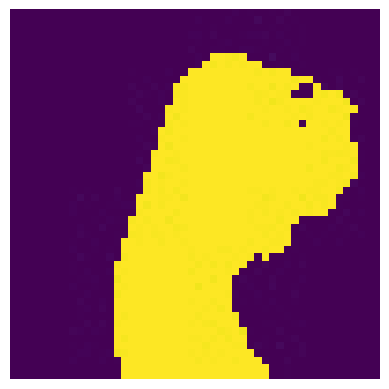

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
U


In [61]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
prediction = model.predict([image(r"D:\Gesture Image Pre-Processed Data\M\35.jpg")])
print(CATEGORIES[prediction.argmax()])